# Bibliotecas

In [1]:
## Pandas 
import pandas as pd
import numpy as np
import seaborn as sns # Alternativa pra gerar gráficos
from sklearn.cluster import KMeans ## Agrupamento pela média das variáveis
import matplotlib.pyplot as plot
from sklearn.preprocessing import OrdinalEncoder # codificar variaveis categoricas
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler # Padronizar dados
from dfply import *
import joblib ## Salvar modelo como pickle
from sklearn.impute import SimpleImputer # imputação simples
from math import sqrt
import random # semente


##Visualização data frame pandas sem truncamento
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', None)

# permite a vizualiçaõ de números flutuantes com duas casas decimais
pd.set_option('display.float_format', '{:.2f}'.format)


np.random.seed(2025)
random.seed(2025)

# Análise de Cluster

In [2]:
# df_cluster_select
df_cluster_select = pd.read_parquet("df_select.parquet")

In [3]:
df_cluster_select.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496573 entries, 0 to 541771
Data columns (total 67 columns):
 #   Column                                 Non-Null Count   Dtype   
---  ------                                 --------------   -----   
 0   cpf_cnpj                               496573 non-null  float64 
 1   sexo                                   496573 non-null  category
 2   idade                                  496573 non-null  int64   
 3   estado_civil                           468577 non-null  category
 4   grau_escolaridade                      445796 non-null  category
 5   natureza_ocupacao                      496573 non-null  category
 6   profissao                              493066 non-null  category
 7   nacionalidade                          496552 non-null  category
 8   uf_residencia                          496573 non-null  category
 9   filial                                 496573 non-null  int64   
 10  tempo_relacionamento_kredilig          496573 non

In [4]:
pd.set_option('display.max_columns', None)
df_cluster_select[df_cluster_select['cpf_cnpj']==3736997]

,cpf_cnpj,sexo,idade,estado_civil,grau_escolaridade,natureza_ocupacao,profissao,nacionalidade,uf_residencia,filial,tempo_relacionamento_kredilig,tempo_inatividade_conta_cartao,tempo_inatividade_conta_carne,situacao_conta,motivo_situacao_conta,canal_origem,situacao_fatura,limite_total,limite_a_vista,limite_saque,limite_mensal,media_dias_entre_contratos_carne,media_dias_entre_contratos_cartao,media_dias_entre_contratos_combinado,media_dias_entre_contratos_reneg,qtd_contratos_regular,CDC,CP,CREDIARIO,CARTAO_A_VISTA,CARTAO_PARCELADO,RENEG,CDC_atraso,CP_atraso,CREDIARIO_atraso,CARTAO_A_VISTA_atraso,CARTAO_PARCELADO_atraso,qtd_contratos_atraso,qtd_contratos_aberto_atraso,qtd_contratos_aberto_regular,qtd_contratos_fechado_atraso,qtd_contratos_fechado_regular,qtd_reneg_aberto_atraso,qtd_reneg_aberto_regular,qtd_reneg_fechado_atraso,qtd_reneg_fechado_regular,valor_da_parcela_aberto,principal_total_aberto,principal_total_fechado,qtd_parcelas_pagas,qtd_parcelas_aberta,creditos_a_vencer,creditos_vencidos,media_atraso_dias,inad_e_reneg,dias_ultimo_contrato,dias_entre_primeiro_e_ultimo_contrato,tempo_ultimo_atraso,valor_pago_nr,valor_principal_total_reneg,valor_principal_total_nr,carne_valor_entrada_nr,qtd_produtos_ativos,dias_maior_atraso,renda_valida_new,renda_comprometida,amortizacao
22063,3736997.00,M,57,UNIAO ESTAVEL,NaN,AUTONOMO SEM VINCULO EMPREGO,CATADOR DE MATERIAIS EM GERAL,BRASILEIRO,SC,69,1707,2,2,Ativa,PAGTO,Fisico,A,13200.00,2376.00,5280.00,739.00,79.10,295.33,66.44,75.75,31,1,1,1,0,1,1,0,0,0,0,0,0,0,11,0,15,0,0,0,5,2197.28,23596.76,21399.36,313,104,20518.22,0.00,4.73,NAO,67,1661,NaN,46228.81,435.70,44560.42,0.00,3,36,1558.00,141.03,45793.11


In [5]:
df_cluster_select[df_cluster_select['cpf_cnpj']==2752237952]

,cpf_cnpj,sexo,idade,estado_civil,grau_escolaridade,natureza_ocupacao,profissao,nacionalidade,uf_residencia,filial,tempo_relacionamento_kredilig,tempo_inatividade_conta_cartao,tempo_inatividade_conta_carne,situacao_conta,motivo_situacao_conta,canal_origem,situacao_fatura,limite_total,limite_a_vista,limite_saque,limite_mensal,media_dias_entre_contratos_carne,media_dias_entre_contratos_cartao,media_dias_entre_contratos_combinado,media_dias_entre_contratos_reneg,qtd_contratos_regular,CDC,CP,CREDIARIO,CARTAO_A_VISTA,CARTAO_PARCELADO,RENEG,CDC_atraso,CP_atraso,CREDIARIO_atraso,CARTAO_A_VISTA_atraso,CARTAO_PARCELADO_atraso,qtd_contratos_atraso,qtd_contratos_aberto_atraso,qtd_contratos_aberto_regular,qtd_contratos_fechado_atraso,qtd_contratos_fechado_regular,qtd_reneg_aberto_atraso,qtd_reneg_aberto_regular,qtd_reneg_fechado_atraso,qtd_reneg_fechado_regular,valor_da_parcela_aberto,principal_total_aberto,principal_total_fechado,qtd_parcelas_pagas,qtd_parcelas_aberta,creditos_a_vencer,creditos_vencidos,media_atraso_dias,inad_e_reneg,dias_ultimo_contrato,dias_entre_primeiro_e_ultimo_contrato,tempo_ultimo_atraso,valor_pago_nr,valor_principal_total_reneg,valor_principal_total_nr,carne_valor_entrada_nr,qtd_produtos_ativos,dias_maior_atraso,renda_valida_new,renda_comprometida,amortizacao
2,2752237952.00,F,71,CASADO,ENSINO FUNDAMENTA 1º GRAU COMP,APOSENTADO EMPRESA PRIVADA,AUXILIAR DE PESSOAL,BRASILEIRO,SC,49,1046,1,1,Ativa,NaN,Fisico,L,7260.00,1307.00,2541.00,476.00,1232.50,469.50,544.80,NaN,7,0,0,1,1,1,1,0,0,0,0,0,0,0,1,0,5,0,0,0,1,200.00,2001.35,8505.70,50,1,200.00,0.00,0.88,NAO,90,2762,NaN,10389.55,1699.90,8807.15,266.67,1,6,1954.00,10.24,8689.65


In [6]:
df_cluster=df_cluster_select.copy()

In [7]:
df_cluster.situacao_fatura.value_counts(dropna=False)

situacao_fatura
L      230169
NaN    143098
A      122347
P         959
Name: count, dtype: int64

In [8]:
df_cluster.isnull().sum()

cpf_cnpj                   0
sexo                       0
idade                      0
estado_civil           27996
grau_escolaridade      50777
                       ...  
qtd_produtos_ativos        0
dias_maior_atraso          0
renda_valida_new        5877
renda_comprometida      7215
amortizacao                0
Length: 67, dtype: int64

In [9]:
## Pré processamento - Imputação
## Ajuste usando as categóricas

df_cluster["situacao_fatura"] = df_cluster["situacao_fatura"] = df_cluster["situacao_fatura"].astype(str)
df_cluster["media_dias_entre_contratos_carne"] = df_cluster["media_dias_entre_contratos_carne"].fillna(0)
df_cluster["media_dias_entre_contratos_cartao"] = df_cluster["media_dias_entre_contratos_cartao"].fillna(0)
df_cluster["media_dias_entre_contratos_combinado"] = df_cluster["media_dias_entre_contratos_combinado"].fillna(0)
df_cluster["media_dias_entre_contratos_reneg"] = df_cluster["media_dias_entre_contratos_reneg"].fillna(0)
df_cluster["uf_residencia"] = df_cluster["uf_residencia"].str.strip().replace("", np.nan).astype("category")
df_cluster["sexo"] = df_cluster["sexo"].str.strip().replace("", np.nan).astype("category")

## Imputação simples
imputer_cat = SimpleImputer(strategy='most_frequent')
imputer_num = SimpleImputer(strategy='mean')

var_null_cat=["grau_escolaridade","estado_civil","nacionalidade","uf_residencia","sexo"]

df_cluster[var_null_cat] = df_cluster[var_null_cat].replace({None: np.nan})

df_cluster[var_null_cat] = pd.DataFrame(
    imputer_cat.fit_transform(df_cluster[var_null_cat]),
    columns=var_null_cat,
    index=df_cluster.index
)


df_cluster_fit=df_cluster.drop(columns=["filial","uf_residencia","situacao_conta","motivo_situacao_conta","tempo_ultimo_atraso",
                                        "carne_valor_entrada_nr","qtd_contratos_regular","qtd_contratos_atraso",
                                        "principal_total_aberto","principal_total_fechado","limite_a_vista","limite_saque",
                                        "limite_mensal","tempo_inatividade_conta_cartao","tempo_inatividade_conta_carne",
                                        "dias_maior_atraso","profissao",'renda_valida_new', 'renda_comprometida',
                                        "valor_principal_total_nr", "valor_pago_nr","valor_principal_total_reneg",
                                        "qtd_produtos_ativos","amortizacao","RENEG","CDC_atraso","CP_atraso","CREDIARIO_atraso","CARTAO_A_VISTA_atraso","CARTAO_PARCELADO_atraso"])

In [10]:
df_cluster_fit=df_cluster_fit.drop(columns=["cpf_cnpj"]) # tirando a coluna CPF_CNPJ

In [11]:
# Transformando as variáveis em dummy
df_cluster_fit_d=pd.get_dummies(df_cluster_fit).astype(int)
df_cluster_fit_d.sample(10)

,idade,tempo_relacionamento_kredilig,limite_total,media_dias_entre_contratos_carne,media_dias_entre_contratos_cartao,media_dias_entre_contratos_combinado,media_dias_entre_contratos_reneg,CDC,CP,CREDIARIO,CARTAO_A_VISTA,CARTAO_PARCELADO,qtd_contratos_aberto_atraso,qtd_contratos_aberto_regular,qtd_contratos_fechado_atraso,qtd_contratos_fechado_regular,qtd_reneg_aberto_atraso,qtd_reneg_aberto_regular,qtd_reneg_fechado_atraso,qtd_reneg_fechado_regular,valor_da_parcela_aberto,qtd_parcelas_pagas,qtd_parcelas_aberta,creditos_a_vencer,creditos_vencidos,media_atraso_dias,dias_ultimo_contrato,dias_entre_primeiro_e_ultimo_contrato,sexo_F,sexo_M,estado_civil_CASADO,estado_civil_DIVORCIADO,estado_civil_SOLTEIRO,estado_civil_UNIAO ESTAVEL,estado_civil_VIUVO,grau_escolaridade_CURSO TECNICO,grau_escolaridade_ENSINO FUNDAMENTA 1º GRAU COMP,grau_escolaridade_ENSINO FUNDAMENTAL 1º GRAU INC,grau_escolaridade_ENSINO MEDIO 2º GRAU COM,grau_escolaridade_ENSINO MEDIO 2º GRAU INC,grau_escolaridade_SEM INSTRUCAO,grau_escolaridade_SUPERIOR COMPLETO,grau_escolaridade_SUPERIOR INCOMPLETO,natureza_ocupacao_APOSENTADO EMPRESA PRIVADA,natureza_ocupacao_APOSENTADO EMPRESA PUBLICA,natureza_ocupacao_APOSENTADO EMPRESA PUBLICA ESTADUAL,natureza_ocupacao_APOSENTADO EMPRESA PUBLICA FEDERAL,natureza_ocupacao_APOSENTADO EMPRESA PUBLICA MUNICIPAL,"natureza_ocupacao_APOSENTADO MILITAR, MILITAR RESERVA OU REFORMADO",natureza_ocupacao_AUTONOMO SEM VINCULO EMPREGO,natureza_ocupacao_BENEFICIARIO DE PENSAO,natureza_ocupacao_BOLSISTA,natureza_ocupacao_DO LAR,natureza_ocupacao_EMPREGADO DE INSTITUICOES FINANCEIRAS PRIVADAS,"natureza_ocupacao_EMPREGADO SETOR PRIVADO,EXCETO INSTITUICAO FINANC",natureza_ocupacao_EMPRESARIO PROPRIETARIO OU FIRMA INDIVIDUAL,natureza_ocupacao_ESTUDANTE,natureza_ocupacao_LOCATARIO RENDA COM ALUGUEIS,natureza_ocupacao_MICROEMPRESARIO/MICROEMPREENDEDOR INDIVIDUAL(MEI),natureza_ocupacao_NATUREZA OCUPACAO NAO ESPECIFICADA ANTERIORMENTE,natureza_ocupacao_PENSIONISTA DA PREVIDENCIA SOCIAL (INSS),natureza_ocupacao_PROFISSIONAL LIBERAL,natureza_ocupacao_SERVIDOR PUBLICO ESTADUAL,natureza_ocupacao_SERVIDOR PUBLICO FEDERAL,natureza_ocupacao_SERVIDOR PUBLICO MUNICIPAL,nacionalidade_BRASILEIRO,nacionalidade_ESTRANGEIRO,canal_origem_Digital,canal_origem_Fisico,situacao_fatura_A,situacao_fatura_L,situacao_fatura_P,situacao_fatura_nan,inad_e_reneg_NAO,inad_e_reneg_SIM
63559,27,1410,0,0,172,172,453,0,0,0,0,0,0,0,2,0,0,1,1,1,70,57,7,496,0,238,178,1253,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1
270641,36,1365,0,0,126,124,70,0,0,0,0,1,2,0,0,1,4,0,0,1,275,36,78,0,3147,341,920,466,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1
382826,34,1056,0,0,59,59,0,0,0,0,0,0,3,0,0,0,0,0,0,0,347,9,28,0,3205,1,928,119,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1
433583,33,1112,0,0,0,0,627,0,0,0,0,0,0,0,1,0,0,1,1,0,176,47,11,1946,0,49,56,1077,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1
145656,58,1178,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,110,0,13,0,1436,0,1197,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1
287364,67,573,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,145,24,29,2755,1450,114,359,235,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1
374336,63,419,3300,67,0,67,0,1,0,1,0,0,0,2,1,1,0,1,0,0,184,32,39,3033,162,20,115,325,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1
206396,59,1174,2252,0,0,534,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,35,0,0,0,21,661,534,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0
146700,38,1948,0,366,0,366,0,1,0,1,0,0,0,0,1,3,0,0,0,0,0,38,0,0,0,13,1637,1098,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0
308718,51,2909,0,64,0,94,229,1,0,1,0,1,0,0,2,3,0,0,6

In [12]:
df_cluster_fit.isnull().sum()

sexo                                     0
idade                                    0
estado_civil                             0
grau_escolaridade                        0
natureza_ocupacao                        0
nacionalidade                            0
tempo_relacionamento_kredilig            0
canal_origem                             0
situacao_fatura                          0
limite_total                             0
media_dias_entre_contratos_carne         0
media_dias_entre_contratos_cartao        0
media_dias_entre_contratos_combinado     0
media_dias_entre_contratos_reneg         0
CDC                                      0
CP                                       0
CREDIARIO                                0
CARTAO_A_VISTA                           0
CARTAO_PARCELADO                         0
qtd_contratos_aberto_atraso              0
qtd_contratos_aberto_regular             0
qtd_contratos_fechado_atraso             0
qtd_contratos_fechado_regular            0
qtd_reneg_a

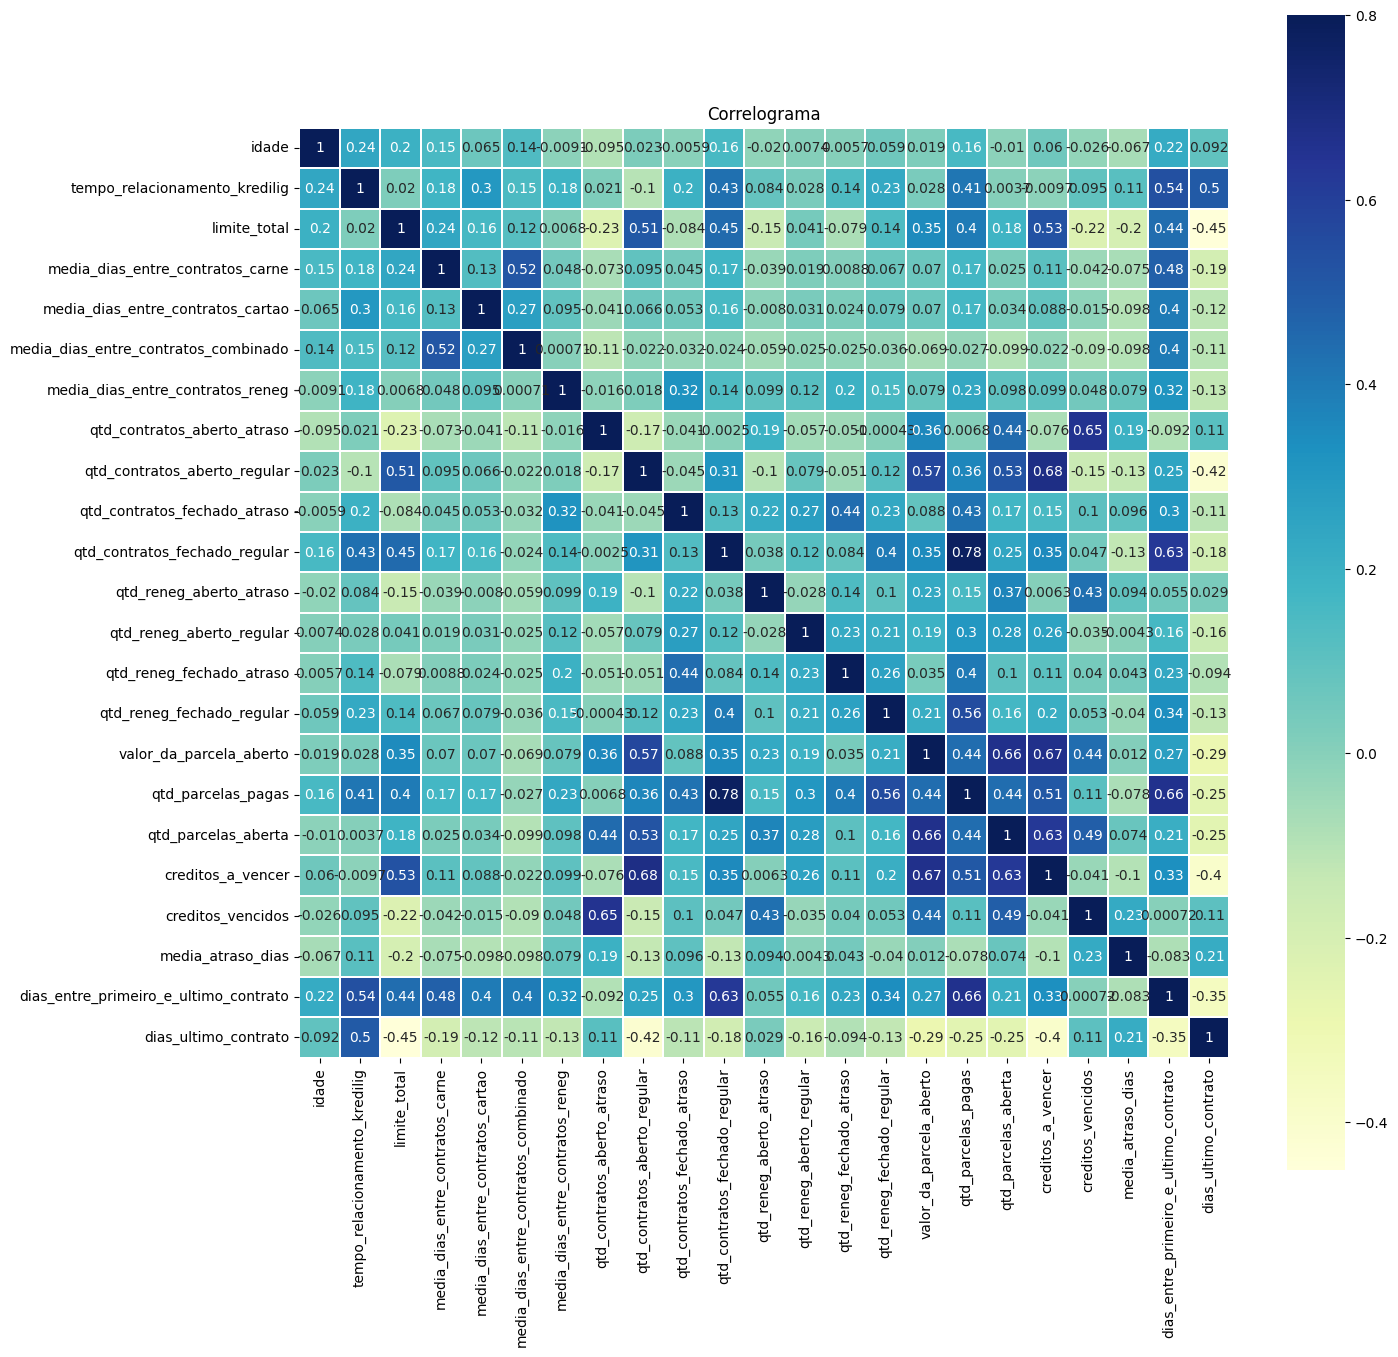

In [13]:
# Correlação entre as variáveis numéricas
# Pearson
df_corr=df_cluster_fit_d[["idade","tempo_relacionamento_kredilig","limite_total",
                    "media_dias_entre_contratos_carne","media_dias_entre_contratos_cartao","media_dias_entre_contratos_combinado",
                  "media_dias_entre_contratos_reneg","qtd_contratos_aberto_atraso","qtd_contratos_aberto_regular",
                  "qtd_contratos_fechado_atraso","qtd_contratos_fechado_regular","qtd_reneg_aberto_atraso","qtd_reneg_aberto_regular","qtd_reneg_fechado_atraso",
                  "qtd_reneg_fechado_regular","valor_da_parcela_aberto","qtd_parcelas_pagas","qtd_parcelas_aberta",
                  "creditos_a_vencer","creditos_vencidos","media_atraso_dias","dias_entre_primeiro_e_ultimo_contrato",
                  "dias_ultimo_contrato"]]


corr=df_corr.corr(method='pearson')
plot.figure(figsize=(15,15))
sns.heatmap(corr,vmax=0.8,linewidths=0.01,
           square=True, annot=True,cmap='YlGnBu', linecolor='white')
plot.title('Correlograma')
plot.show()

In [14]:
# Opção 1
# Padronização media 0 e variancia 1
'''sc = StandardScaler()
sc.fit(df_cluster_fit)
sc.mean_
sc.var_
# padronização dos dados
df_cluster_fit_standard = pd.DataFrame(sc.transform(df_cluster_fit), columns=df_cluster_fit.columns)
df_cluster_fit_standard.sample(10)'''

### Opção 2

## Padronização por distancia de cosseno
df_cluster_fit_standard=df_cluster_fit_d.div(df_cluster_fit_d.sum(axis=1),axis='rows')
df_cluster_fit_standard.sample(10)


,idade,tempo_relacionamento_kredilig,limite_total,media_dias_entre_contratos_carne,media_dias_entre_contratos_cartao,media_dias_entre_contratos_combinado,media_dias_entre_contratos_reneg,CDC,CP,CREDIARIO,CARTAO_A_VISTA,CARTAO_PARCELADO,qtd_contratos_aberto_atraso,qtd_contratos_aberto_regular,qtd_contratos_fechado_atraso,qtd_contratos_fechado_regular,qtd_reneg_aberto_atraso,qtd_reneg_aberto_regular,qtd_reneg_fechado_atraso,qtd_reneg_fechado_regular,valor_da_parcela_aberto,qtd_parcelas_pagas,qtd_parcelas_aberta,creditos_a_vencer,creditos_vencidos,media_atraso_dias,dias_ultimo_contrato,dias_entre_primeiro_e_ultimo_contrato,sexo_F,sexo_M,estado_civil_CASADO,estado_civil_DIVORCIADO,estado_civil_SOLTEIRO,estado_civil_UNIAO ESTAVEL,estado_civil_VIUVO,grau_escolaridade_CURSO TECNICO,grau_escolaridade_ENSINO FUNDAMENTA 1º GRAU COMP,grau_escolaridade_ENSINO FUNDAMENTAL 1º GRAU INC,grau_escolaridade_ENSINO MEDIO 2º GRAU COM,grau_escolaridade_ENSINO MEDIO 2º GRAU INC,grau_escolaridade_SEM INSTRUCAO,grau_escolaridade_SUPERIOR COMPLETO,grau_escolaridade_SUPERIOR INCOMPLETO,natureza_ocupacao_APOSENTADO EMPRESA PRIVADA,natureza_ocupacao_APOSENTADO EMPRESA PUBLICA,natureza_ocupacao_APOSENTADO EMPRESA PUBLICA ESTADUAL,natureza_ocupacao_APOSENTADO EMPRESA PUBLICA FEDERAL,natureza_ocupacao_APOSENTADO EMPRESA PUBLICA MUNICIPAL,"natureza_ocupacao_APOSENTADO MILITAR, MILITAR RESERVA OU REFORMADO",natureza_ocupacao_AUTONOMO SEM VINCULO EMPREGO,natureza_ocupacao_BENEFICIARIO DE PENSAO,natureza_ocupacao_BOLSISTA,natureza_ocupacao_DO LAR,natureza_ocupacao_EMPREGADO DE INSTITUICOES FINANCEIRAS PRIVADAS,"natureza_ocupacao_EMPREGADO SETOR PRIVADO,EXCETO INSTITUICAO FINANC",natureza_ocupacao_EMPRESARIO PROPRIETARIO OU FIRMA INDIVIDUAL,natureza_ocupacao_ESTUDANTE,natureza_ocupacao_LOCATARIO RENDA COM ALUGUEIS,natureza_ocupacao_MICROEMPRESARIO/MICROEMPREENDEDOR INDIVIDUAL(MEI),natureza_ocupacao_NATUREZA OCUPACAO NAO ESPECIFICADA ANTERIORMENTE,natureza_ocupacao_PENSIONISTA DA PREVIDENCIA SOCIAL (INSS),natureza_ocupacao_PROFISSIONAL LIBERAL,natureza_ocupacao_SERVIDOR PUBLICO ESTADUAL,natureza_ocupacao_SERVIDOR PUBLICO FEDERAL,natureza_ocupacao_SERVIDOR PUBLICO MUNICIPAL,nacionalidade_BRASILEIRO,nacionalidade_ESTRANGEIRO,canal_origem_Digital,canal_origem_Fisico,situacao_fatura_A,situacao_fatura_L,situacao_fatura_P,situacao_fatura_nan,inad_e_reneg_NAO,inad_e_reneg_SIM
298336,0.00,0.46,0.00,0.00,0.01,0.02,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.28,0.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
390687,0.01,0.07,0.78,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.03,0.00,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
369178,0.01,0.15,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0.01,0.01,0.00,0.58,0.00,0.11,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
203374,0.01,0.08,0.41,0.00,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.33,0.00,0.00,0.02,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
242155,0.01,0.24,0.00,0.04,0.01,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0

In [15]:
df_cluster_fit_standard.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496573 entries, 0 to 541771
Data columns (total 75 columns):
 #   Column                                                               Non-Null Count   Dtype  
---  ------                                                               --------------   -----  
 0   idade                                                                496573 non-null  float64
 1   tempo_relacionamento_kredilig                                        496573 non-null  float64
 2   limite_total                                                         496573 non-null  float64
 3   media_dias_entre_contratos_carne                                     496573 non-null  float64
 4   media_dias_entre_contratos_cartao                                    496573 non-null  float64
 5   media_dias_entre_contratos_combinado                                 496573 non-null  float64
 6   media_dias_entre_contratos_reneg                                     496573 non-null  float64
 7 

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


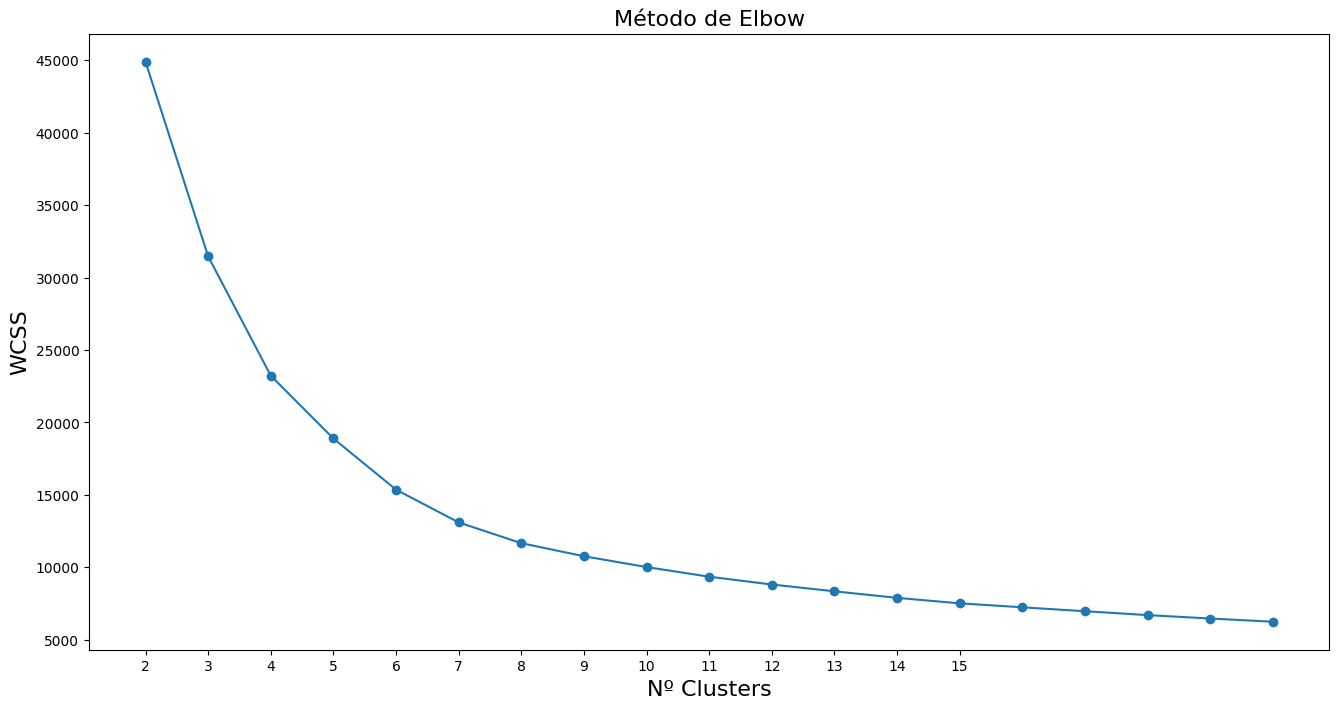

In [55]:
## Metodo elbow
################################
#Identificando a quantidade de clusters - 
elbow = []
K = range(2,21)
for k in K:
    print(k)
    kmeanElbow = KMeans(n_clusters = k , init='k-means++',n_init=50, max_iter=150, random_state =100).fit(df_cluster_fit_standard)
    elbow.append(kmeanElbow.inertia_)
    
################################# nesse caso poderia ser 7 ou 8 pois apartir do 6 o erro quadrático médio se torna menor e menos significativo, mas pensando no contexto dos dados e que estamos falando em valores altos, pode-ser que uma pequena melhora do erro quadratico medio pode ser muito siginifcativo
plot.figure(figsize=(16,8))
plot.plot(K, elbow, marker='o')
plot.xlabel('Nº Clusters', fontsize=16)
plot.xticks(range(2,16)) # ajustar range
plot.ylabel('WCSS', fontsize=16) # Soma dos Quadrados Dentro dos Clusters
plot.title('Método de Elbow', fontsize=16)
plot.show()

In [56]:
elbow

[44902.85482800222,
 31463.861669411686,
 23224.993308517514,
 18888.89251667529,
 15355.773258188772,
 13097.079358325864,
 11661.979146021149,
 10761.140766170822,
 10014.06073979107,
 9347.262587571026,
 8807.893713145442,
 8338.375466583151,
 7886.48248267145,
 7508.840409226395,
 7233.2300981918615,
 6963.00773463456,
 6696.2143641334,
 6460.003989770598,
 6238.520603083713]

In [57]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

In [58]:
# calculando a quantidade ótima de clusters
n = optimal_number_of_clusters(elbow)
print(n)

7


In [23]:
#################################
# Método K means
kmeans = KMeans(n_clusters = 5,init='k-means++',n_init=50, max_iter=150, random_state =100).fit(df_cluster_fit_standard)

#################################
print(kmeans.labels_)
print(kmeans)

[0 2 2 ... 4 1 2]
KMeans(max_iter=150, n_clusters=5, n_init=50, random_state=100)


In [ ]:
# Salvando o modelo como um objeto pickle
#joblib.dump(kmeans, "kmeans.pkl")

['kmeans_new.pkl']

# Interpretação dos grupos

In [24]:
# leitura do modelo como um objeto pickle
kmeans = joblib.load("kmeans_new.pkl")

In [25]:
#################################
## Rotualando os dados
labels = pd.DataFrame(data=kmeans.labels_)
#################################
df_cluster.loc[:, 'Cluster'] = kmeans.labels_

In [26]:
### Checando a quantidade por cluster
df_cluster.Cluster.value_counts(dropna=False)

Cluster
4    132413
0    129406
1    103518
2     83239
3     47997
Name: count, dtype: int64

In [27]:
df_cluster.head(5)

,cpf_cnpj,sexo,idade,estado_civil,grau_escolaridade,natureza_ocupacao,profissao,nacionalidade,uf_residencia,filial,tempo_relacionamento_kredilig,tempo_inatividade_conta_cartao,tempo_inatividade_conta_carne,situacao_conta,motivo_situacao_conta,canal_origem,situacao_fatura,limite_total,limite_a_vista,limite_saque,limite_mensal,media_dias_entre_contratos_carne,media_dias_entre_contratos_cartao,media_dias_entre_contratos_combinado,media_dias_entre_contratos_reneg,qtd_contratos_regular,CDC,CP,CREDIARIO,CARTAO_A_VISTA,CARTAO_PARCELADO,RENEG,CDC_atraso,CP_atraso,CREDIARIO_atraso,CARTAO_A_VISTA_atraso,CARTAO_PARCELADO_atraso,qtd_contratos_atraso,qtd_contratos_aberto_atraso,qtd_contratos_aberto_regular,qtd_contratos_fechado_atraso,qtd_contratos_fechado_regular,qtd_reneg_aberto_atraso,qtd_reneg_aberto_regular,qtd_reneg_fechado_atraso,qtd_reneg_fechado_regular,valor_da_parcela_aberto,principal_total_aberto,principal_total_fechado,qtd_parcelas_pagas,qtd_parcelas_aberta,creditos_a_vencer,creditos_vencidos,media_atraso_dias,inad_e_reneg,dias_ultimo_contrato,dias_entre_primeiro_e_ultimo_contrato,tempo_ultimo_atraso,valor_pago_nr,valor_principal_total_reneg,valor_principal_total_nr,carne_valor_entrada_nr,qtd_produtos_ativos,dias_maior_atraso,renda_valida_new,renda_comprometida,amortizacao,Cluster
0,11522898700.00,M,36,SOLTEIRO,ENSINO MEDIO 2º GRAU COM,AUTONOMO SEM VINCULO EMPREGO,ELETRICISTA DE INSTALACOES,BRASILEIRO,SC,33,2466,649,649,Bloqueada,ATRASO B,Fisico,A,0.00,0.00,0.00,0.00,0.00,51.00,51.00,0.00,0,0,0,0,0,0,0,0,0,0,0,1,3,3,0,0,0,0,0,0,0,523.00,3937.00,0.00,5,20,0.00,3489.00,11.33,SIM,2383,102,NaN,852.00,0.00,3937.00,NaN,0,42,2088.00,25.05,852.00,3
1,60975377949.00,M,63,CASADO,ENSINO MEDIO 2º GRAU COM,"EMPREGADO SETOR PRIVADO,EXCETO INSTITUICAO FINANC",ENGENHEIRO AGRONOMO,BRASILEIRO,SC,5,1185,347,1185,Ativa,PAGTO,Fisico,L,12000.00,2160.00,4800.00,885.00,0.00,0.00,0.00,0.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.00,0.00,4463.40,10,0,0.00,0.00,2.00,NAO,1206,0,NaN,4463.40,0.00,4463.40,NaN,0,4,4970.00,0.00,4463.40,1
2,2752237952.00,F,71,CASADO,ENSINO FUNDAMENTA 1º GRAU COMP,APOSENTADO EMPRESA PRIVADA,AUXILIAR DE PESSOAL,BRASILEIRO,SC,49,1046,1,1,Ativa,NaN,Fisico,L,7260.00,1307.00,2541.00,476.00,1232.50,469.50,544.80,0.00,7,0,0,1,1,1,1,0,0,0,0,0,0,0,1,0,5,0,0,0,1,200.00,2001.35,8505.70,50,1,200.00,0.00,0.88,NAO,90,2762,NaN,10389.55,1699.90,8807.15,266.67,1,6,1954.00,10.24,8689.65,4
3,24645605968.00,M,71,CASADO,ENSINO MEDIO 2º GRAU COM,APOSENTADO EMPRESA PUBLICA,APOSENTADO,BRASILEIRO,SC,100,2895,61,369,Bloqueada,ATRASO,Fisico,A,12000.00,2160.00,4800.00,500.00,0.00,669.33,334.67,64.56,49,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,7,0,7,0,35,1824.03,19267.60,32431.38,362,58,8645.89,3648.06,1.76,SIM,81,2708,NaN,17822.45,38403.34,13295.64,30.00,0,17,1412.00,129.18,-20580.89,0
4,14683995867.00,F,56,CASADO,ENSINO MEDIO 2º GRAU COM,APOSENTADO EMPRESA PRIVADA,AUXILIAR DE LIMPEZA. SERVENTE,BRASILEIRO,SC,113,559,90,90,Ativa,NaN,Fisico,nan,1836.00,330.00,0.00,153.00,0.00,0.00,0.00,0.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.00,0.00,788.99,8,0,0.00,0.00,20.00,NAO,580,0,NaN,904.70,0.00,788.99,0.00,0,33,1484.00,0.00,904.70,1


In [28]:
### Checando a quantidade Cluster por inad_reneg
pd.crosstab(df_cluster["inad_e_reneg"], df_cluster["Cluster"])

Cluster,0,1,2,3,4
inad_e_reneg,,,,,
NAO,67832,97342,62385,231,120605
SIM,61574,6176,20854,47766,11808


In [29]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496573 entries, 0 to 541771
Data columns (total 68 columns):
 #   Column                                 Non-Null Count   Dtype   
---  ------                                 --------------   -----   
 0   cpf_cnpj                               496573 non-null  float64 
 1   sexo                                   496573 non-null  object  
 2   idade                                  496573 non-null  int64   
 3   estado_civil                           496573 non-null  object  
 4   grau_escolaridade                      496573 non-null  object  
 5   natureza_ocupacao                      496573 non-null  category
 6   profissao                              493066 non-null  category
 7   nacionalidade                          496573 non-null  object  
 8   uf_residencia                          496573 non-null  object  
 9   filial                                 496573 non-null  int64   
 10  tempo_relacionamento_kredilig          496573 non

In [ ]:
'''df_cluster_csv=df_cluster[["cpf_cnpj","Cluster"]]
df_cluster_csv.to_csv('cluster.csv', index=False)'''

'df_cluster_csv=df_cluster[["cpf_cnpj","Cluster"]]\ndf_cluster_csv.to_csv(\'cluster.csv\', index=False)'

<Axes: >

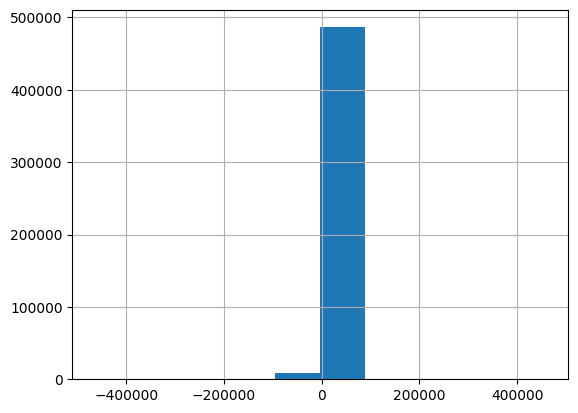

In [30]:
df_cluster["amortizacao"].hist()

In [31]:
df_cluster.amortizacao.describe()

count    496573.00
mean       7313.72
std       12432.69
min     -464162.83
25%        1037.84
50%        3289.00
75%        9064.17
max      458543.23
Name: amortizacao, dtype: float64

In [32]:
pd.cut(df_cluster.amortizacao,
       bins=[-np.inf,-0.99,0,2000,5000,np.inf],
       labels=["Negativo","0","Até R$2 mil","R$2 mil a R$5mil","Acima de R$5mil"]).value_counts()

amortizacao
Acima de R$5mil     195422
Até R$2 mil         147651
R$2 mil a R$5mil    113029
Negativo             21435
0                    19036
Name: count, dtype: int64

In [33]:
# Categorizando as variáveis numéricas
df_cluster['fx_Idade']=pd.qcut(df_cluster.idade,q=8)# categorização por quantil
df_cluster['fx_Relacionamento']=pd.cut(df_cluster.tempo_relacionamento_kredilig, 
                                          bins=[0,365,365*2,365*3,365*4,365*5,365*6,365*7,365*8, 365*9,np.inf], 
                                          labels=["Até 1 ano", "1 a 2 anos", "2 a 3 anos","3 a 4 anos","4 a 5 anos","5 a 6 anos","6 a 7 anos","7 a 8 anos","8 a 9 anos", "Acima de 9 anos"]) # categorização por bins já definidos
df_cluster['fx_Limite']=pd.cut(df_cluster.limite_total,bins=[-0.99,0,1000,5000,10000,20000,np.inf],labels=["Sem Limite","Até R$1 mil","R$1 mil a R$5 mil","R$5 mil a R$10mil","R$10 mil a R$20mil","Acima de R$20mil"])
df_cluster['fx_contratos_aberto_atraso']=pd.cut(df_cluster.qtd_contratos_aberto_atraso,bins=[-0.99,0,1,3,np.inf],labels=["0","1","3","+3"])
df_cluster['fx_contratos_aberto_regular']=pd.cut(df_cluster.qtd_contratos_aberto_regular,bins=[-0.99,0,1,3,np.inf],labels=["0","1","3","+3"])
df_cluster['fx_contratos_fechado_atraso']=pd.cut(df_cluster.qtd_contratos_fechado_atraso,bins=[-0.99,0,1,3,np.inf],labels=["0","1","3","+3"])
df_cluster['fx_contratos_fechado_regular']=pd.cut(df_cluster.qtd_contratos_fechado_regular,bins=[-0.99,0,1,3,10,np.inf],labels=["0","1","1 a 3","4 a 10","+10"])
df_cluster['fx_reneg_aberto_atraso']=pd.cut(df_cluster.qtd_reneg_aberto_atraso,bins=[-0.99,0,1,3,np.inf],labels=["0","1","3","+3"])
df_cluster['fx_reneg_aberto_regular']=pd.cut(df_cluster.qtd_reneg_aberto_regular,bins=[-0.99,0,1,3,np.inf],labels=["0","1","3","+3"])
df_cluster['fx_reneg_fechado_atraso']=pd.cut(df_cluster.qtd_reneg_fechado_atraso,bins=[-0.99,0,1,3,np.inf],labels=["0","1","3","+3"])
df_cluster['fx_reneg_fechado_regular']=pd.cut(df_cluster.qtd_reneg_fechado_regular,bins=[-0.99,0,1,3,np.inf],labels=["0","1","3","+3"])
df_cluster['fx_valor_da_parcela']=pd.cut(df_cluster.valor_da_parcela_aberto,bins=[-0.99,0,100,250,500,1000,np.inf],labels=["Sem contrato aberto","Até R$100","R$ 100 a R$250","R$251 a R$500", "R$501  a R$1 mil", "R$ Acima de R$1 mil"])
df_cluster['fx_qtd_parcelas_pagas']=pd.cut(df_cluster.qtd_parcelas_pagas,bins=[-0.99,0,10,20,50,np.inf],labels=["0","Até 10","11 a 20","21 a 50", "Acima 50"])
df_cluster['fx_qtd_parcelas_abertas']=pd.cut(df_cluster.qtd_parcelas_aberta,bins=[-0.99,0,10,20,50,np.inf],labels=["0","Até 10","11 a 20","21 a 50", "Acima 50"])
df_cluster['fx_dias_media_atraso']=pd.cut(df_cluster.media_atraso_dias,bins=[-0.99,0,1,2,3,7,15,30,60,np.inf],labels=["0","1","2","3","4 a 7","8 a 15","16 a 30","31 a 60","Acima 60"])
df_cluster['fx_dias_maior_atraso']=pd.cut(df_cluster.dias_maior_atraso,bins=[-0.99,0,1,2,3,7,15,30,60,np.inf],labels=["0","1","2","3","4 a 7","8 a 15","16 a 30","31 a 60","Acima 60"])
df_cluster['fx_principal_total_aberto']=pd.cut(df_cluster.principal_total_aberto,bins=[-0.99,0,1000,2000,3000,5000,10000,np.inf],labels=["0","Até R$1 mil","R$1 mil a R$2 mil","R$2 mil a R$3mil","R$3 mil a R$4mil","R$5 mil a R$10mil","Acima de R$10mil"])
df_cluster['fx_principal_total_fechado']=pd.cut(df_cluster.principal_total_fechado,bins=[-0.99,0,1000,2000,3000,5000,10000,np.inf],labels=["0","Até R$1 mil","R$1 mil a R$2 mil","R$2 mil a R$3mil","R$3 mil a R$4mil","R$5 mil a R$10mil","Acima de R$10mil"])
df_cluster['fx_creditos_a_vencer']=pd.cut(df_cluster.creditos_a_vencer,bins=[-0.99,0,1000,2000,3000,5000,np.inf],labels=["0","Até R$1 mil","R$1 mil a R$2 mil","R$2 mil a R$3mil","R$3 mil a R$5mil","Acima de R$5mil"])
df_cluster['fx_creditos_vencidos']=pd.cut(df_cluster.creditos_vencidos,bins=[-0.99,0,1000,2000,3000,5000,np.inf],labels=["0","Até R$1 mil","R$1 mil a R$2 mil","R$2 mil a R$3mil","R$3 mil a R$5mil","Acima de R$5mil"])
df_cluster['med_entre_contratos_comb']=pd.cut(df_cluster.media_dias_entre_contratos_combinado,bins=[-0.99,0,30,60,90,180,365,np.inf],labels=["0","Até 30","31 a 60","61 a 90","91 a 180","180 a 365", "Acima de 1 ano"])
df_cluster['med_dias_contratos_reneg']=pd.cut(df_cluster.media_dias_entre_contratos_reneg,bins=[-0.99,0,60,90,180,365,np.inf],labels=["0","Até 60","61 a 90","91 a 180","180 a 365", "Acima de 1 ano"])
df_cluster['fx_dias_ultimo_contrato']=pd.qcut(df_cluster.dias_ultimo_contrato,q=6)
df_cluster['fx_entre_prim_ult_contrato']=pd.cut(df_cluster.dias_entre_primeiro_e_ultimo_contrato, 
                                          bins=[-0.99,0,365,365*2,365*3,365*4,365*5,365*6,365*7,365*8,np.inf], 
                                          labels=["0","Até 1 ano", "1 a 2 anos", "2 a 3 anos","3 a 4 anos","4 a 5 anos","5 a 6 anos","6 a 7 anos","7 a 8 anos", "Acima de 8 anos"])
df_cluster['fx_valor_entrada']=pd.cut(df_cluster.carne_valor_entrada_nr,bins=[-0.99,0,100,250,500,1000,np.inf],labels=["0","Até R$100","R$ 100 a R$250","R$251 a R$500", "R$501  a R$1 mil", "R$ Acima de R$1 mil"])
df_cluster['fx_ultimo_atraso']=pd.cut(df_cluster.tempo_ultimo_atraso, 
                                          bins=[0,365,365*2,365*3,365*4,365*5,np.inf], 
                                          labels=["Até 1 ano", "1 a 2 anos", "2 a 3 anos","3 a 4 anos","4 a 5 anos", "Acima de 5 anos"])
df_cluster["fx_renda_valida"]=pd.cut(df_cluster.renda_valida_new, 
                                          bins=[0,1518,1518*2,1518*3,1518*4,np.inf], 
                                          labels=["Até 1 SM", "De 1 SM a 2 SM", "De 2 SM a 3 SM","De 3 SM a 4 SM", "Acima de 4 SM"])
df_cluster["fx_renda_comprometida"]=pd.cut(df_cluster.renda_comprometida,
                                          bins=[0,10,20,30,70,np.inf], 
                                          labels=["Até 10%","10% a 20%" ,"20% a 30%", "30% a 70%", "Acima de 70%"])
df_cluster["fx_valor_pago_nr"]=pd.cut(df_cluster.valor_pago_nr,
       bins=[-0.99,0,2000,5000,10000,20000,np.inf],
       labels=["0","Até R$2 mil","R$2 mil a R$5mil","R$5 mil a R$10mil","R$10 mil a R$20mil","Acima de R$20mil"])
df_cluster["fx_principal_total_nr"]=pd.cut(df_cluster.valor_principal_total_nr,
       bins=[-0.99,0,2000,5000,10000,20000,np.inf],
       labels=["0","Até R$2 mil","R$2 mil a R$5mil","R$5 mil a R$10mil","R$10 mil a R$20mil","Acima de R$20mil"])
df_cluster["fx_principal_total_reneg"]=pd.cut(df_cluster.valor_principal_total_reneg,
       bins=[-0.99,0,1000,2000,5000,np.inf],
       labels=["0","Até R$1 mil","R$1 mil a R$2mil","R$2 mil a R$5mil","Acima de R$5mil"])
df_cluster["fx_amortizacao"]=pd.cut(df_cluster.amortizacao,
       bins=[-np.inf,-0.99,0,2000,5000,np.inf],
       labels=["Negativo","0","Até R$2 mil","R$2 mil a R$5mil","Acima de R$5mil"])
df_cluster.head()


,cpf_cnpj,sexo,idade,estado_civil,grau_escolaridade,natureza_ocupacao,profissao,nacionalidade,uf_residencia,filial,tempo_relacionamento_kredilig,tempo_inatividade_conta_cartao,tempo_inatividade_conta_carne,situacao_conta,motivo_situacao_conta,canal_origem,situacao_fatura,limite_total,limite_a_vista,limite_saque,limite_mensal,media_dias_entre_contratos_carne,media_dias_entre_contratos_cartao,media_dias_entre_contratos_combinado,media_dias_entre_contratos_reneg,qtd_contratos_regular,CDC,CP,CREDIARIO,CARTAO_A_VISTA,CARTAO_PARCELADO,RENEG,CDC_atraso,CP_atraso,CREDIARIO_atraso,CARTAO_A_VISTA_atraso,CARTAO_PARCELADO_atraso,qtd_contratos_atraso,qtd_contratos_aberto_atraso,qtd_contratos_aberto_regular,qtd_contratos_fechado_atraso,qtd_contratos_fechado_regular,qtd_reneg_aberto_atraso,qtd_reneg_aberto_regular,qtd_reneg_fechado_atraso,qtd_reneg_fechado_regular,valor_da_parcela_aberto,principal_total_aberto,principal_total_fechado,qtd_parcelas_pagas,qtd_parcelas_aberta,creditos_a_vencer,creditos_vencidos,media_atraso_dias,inad_e_reneg,dias_ultimo_contrato,dias_entre_primeiro_e_ultimo_contrato,tempo_ultimo_atraso,valor_pago_nr,valor_principal_total_reneg,valor_principal_total_nr,carne_valor_entrada_nr,qtd_produtos_ativos,dias_maior_atraso,renda_valida_new,renda_comprometida,amortizacao,Cluster,fx_Idade,fx_Relacionamento,fx_Limite,fx_contratos_aberto_atraso,fx_contratos_aberto_regular,fx_contratos_fechado_atraso,fx_contratos_fechado_regular,fx_reneg_aberto_atraso,fx_reneg_aberto_regular,fx_reneg_fechado_atraso,fx_reneg_fechado_regular,fx_valor_da_parcela,fx_qtd_parcelas_pagas,fx_qtd_parcelas_abertas,fx_dias_media_atraso,fx_dias_maior_atraso,fx_principal_total_aberto,fx_principal_total_fechado,fx_creditos_a_vencer,fx_creditos_vencidos,med_entre_contratos_comb,med_dias_contratos_reneg,fx_dias_ultimo_contrato,fx_entre_prim_ult_contrato,fx_valor_entrada,fx_ultimo_atraso,fx_renda_valida,fx_renda_comprometida,fx_valor_pago_nr,fx_principal_total_nr,fx_principal_total_reneg,fx_amortizacao
0,11522898700.00,M,36,SOLTEIRO,ENSINO MEDIO 2º GRAU COM,AUTONOMO SEM VINCULO EMPREGO,ELETRICISTA DE INSTALACOES,BRASILEIRO,SC,33,2466,649,649,Bloqueada,ATRASO B,Fisico,A,0.00,0.00,0.00,0.00,0.00,51.00,51.00,0.00,0,0,0,0,0,0,0,0,0,0,0,1,3,3,0,0,0,0,0,0,0,523.00,3937.00,0.00,5,20,0.00,3489.00,11.33,SIM,2383,102,NaN,852.00,0.00,3937.00,NaN,0,42,2088.00,25.05,852.00,3,"(30.0, 38.0]",6 a 7 anos,Sem Limite,3,0,0,0,0,0,0,0,R$501 a R$1 mil,Até 10,11 a 20,8 a 15,31 a 60,R$3 mil a R$4mil,0,0,R$3 mil a R$5mil,31 a 60,0,"(1761.0, 3699.0]",Até 1 ano,NaN,NaN,De 1 SM a 2 SM,20% a 30%,Até R$2 mil,R$2 mil a R$5mil,0,Até R$2 mil
1,60975377949.00,M,63,CASADO,ENSINO MEDIO 2º GRAU COM,"EMPREGADO SETOR PRIVADO,EXCETO INSTITUICAO FINANC",ENGENHEIRO AGRONOMO,BRASILEIRO,SC,5,1185,347,1185,Ativa,PAGTO,Fisico,L,12000.00,2160.00,4800.00,885.00,0.00,0.00,0.00,0.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.00,0.00,4463.40,10,0,0.00,0.00,2.00,NAO,1206,0,NaN,4463.40,0.00,4463.40,NaN,0,4,4970.00,0.00,4463.40,1,"(57.0, 63.0]",3 a 4 anos,R$10 mil a R$20mil,0,0,0,1,0,0,0,0,Sem contrato aberto,Até 10,0,2,4 a 7,0,R$3 mil a R$4mil,0,0,0,0,"(1053.0, 1761.0]",0,NaN,NaN,De 3 SM a 4 SM,NaN,R$2 mil a R$5mil,R$2 mil a R$5mil,0,R$2 mil a R$5mil
2,2752237952.00,F,71,CASADO,ENSINO FUNDAMENTA 1º GRAU COMP,APOSENTADO EMPRESA PRIVADA,AUXILIAR DE PESSOAL,BRASILEIRO,SC,49,1046,1,1,Ativa,NaN,Fisico,L,7260.00,1307.00,2541.00,476.00,1232.50,469.50,544.80,0.00,7,0,0,1,1,1,1,0,0,0,0,0,0,0,1,0,5,0,0,0,1,200.00,2001.35,8505.70,50,1,200.00,0.00,0.88,NAO,90,2762,NaN,10389.55,1699.90,8807.15,266.67,1,6,1954.00,10.24,8689.65,4,"(63.0, 71.0]",2 a 3 anos,R$5 mil a R$10mil,0,1,0,4 a 10,0,0,0,1,R$ 100 a R$250,21 a 50,Até 10,1,4 a 7,R$2 mil a R$3mil,R$5 mil a R$10mil,Até R$1 mil,0,Acima de 1 ano,0,"(12.999, 118.0]",7 a 8 anos,R$251 a R$500,NaN,De 1 SM a 2 SM,10% a 20%,R$10 mil a R$20mil,R$5 mil a R$10mil,R$1 mil a R$2mil,Acima de R$5mil
3,24645605968.00,M,71,CASADO,ENSINO MEDIO 2º GRAU COM,APOSENTADO EMPRESA PUBLICA,APOSENTADO,BR

### EDA cluster

In [34]:
df_cluster.columns.to_list()

['cpf_cnpj',
 'sexo',
 'idade',
 'estado_civil',
 'grau_escolaridade',
 'natureza_ocupacao',
 'profissao',
 'nacionalidade',
 'uf_residencia',
 'filial',
 'tempo_relacionamento_kredilig',
 'tempo_inatividade_conta_cartao',
 'tempo_inatividade_conta_carne',
 'situacao_conta',
 'motivo_situacao_conta',
 'canal_origem',
 'situacao_fatura',
 'limite_total',
 'limite_a_vista',
 'limite_saque',
 'limite_mensal',
 'media_dias_entre_contratos_carne',
 'media_dias_entre_contratos_cartao',
 'media_dias_entre_contratos_combinado',
 'media_dias_entre_contratos_reneg',
 'qtd_contratos_regular',
 'CDC',
 'CP',
 'CREDIARIO',
 'CARTAO_A_VISTA',
 'CARTAO_PARCELADO',
 'RENEG',
 'CDC_atraso',
 'CP_atraso',
 'CREDIARIO_atraso',
 'CARTAO_A_VISTA_atraso',
 'CARTAO_PARCELADO_atraso',
 'qtd_contratos_atraso',
 'qtd_contratos_aberto_atraso',
 'qtd_contratos_aberto_regular',
 'qtd_contratos_fechado_atraso',
 'qtd_contratos_fechado_regular',
 'qtd_reneg_aberto_atraso',
 'qtd_reneg_aberto_regular',
 'qtd_reneg_fe

In [35]:
#%pip install xlsxwriter

tabelas_de_contingencia = {}

variavel_alvo = 'Cluster'

# Selecionando apenas colunas categóricas
colunas_categoricas = [
 'sexo',
 'estado_civil',
 'grau_escolaridade',
 'natureza_ocupacao',
 'nacionalidade',
 'uf_residencia',
 'situacao_conta',
 'motivo_situacao_conta',
 'canal_origem',
 'situacao_fatura',
 'CDC',
 'CP',
 'CREDIARIO',
 "CARTAO_A_VISTA",
 "CARTAO_PARCELADO",
 "RENEG",
 "qtd_produtos_ativos",
 'inad_e_reneg',
 'fx_Idade',
 'fx_Relacionamento',
 'fx_Limite',
 'fx_contratos_aberto_atraso',
 'fx_contratos_aberto_regular',
 'fx_contratos_fechado_atraso',
 'fx_contratos_fechado_regular',
 'fx_reneg_aberto_atraso',
 'fx_reneg_aberto_regular',
 'fx_reneg_fechado_atraso',
 'fx_reneg_fechado_regular',
 'fx_valor_da_parcela',
 'fx_qtd_parcelas_pagas',
 'fx_qtd_parcelas_abertas',
 'fx_dias_media_atraso',
 'fx_dias_maior_atraso',
 'fx_principal_total_aberto',
 'fx_principal_total_fechado',
 'fx_creditos_a_vencer',
 'fx_creditos_vencidos',
 'med_entre_contratos_comb',
 'med_dias_contratos_reneg',
 'fx_dias_ultimo_contrato',
 'fx_entre_prim_ult_contrato',
 'fx_valor_entrada',
 'fx_ultimo_atraso',
 "fx_renda_valida",
 "fx_renda_comprometida",
 'fx_valor_pago_nr',
 'fx_principal_total_nr',
 'fx_principal_total_reneg',
 'fx_amortizacao',
 "CDC_atraso","CP_atraso","CREDIARIO_atraso","CARTAO_A_VISTA_atraso","CARTAO_PARCELADO_atraso"]

# Criando tabelas de contingência para cada variável categórica
for col in colunas_categoricas:
    print(f"\nTabela de Contingência: {col} x {variavel_alvo}")
    tabela =pd.crosstab(df_cluster[col], df_cluster[variavel_alvo])
    tabelas_de_contingencia[col]=tabela
    print(tabela)

'''#Criando um nome de arquivo
nome_arquivo = f"tabelas_cluster.xlsx"

# Salvando no Excel - cada variável em uma planilha
with pd.ExcelWriter(nome_arquivo, engine="xlsxwriter") as writer:
    for col, tabela in tabelas_de_contingencia.items():
        tabela.to_excel(writer, sheet_name=col)'''


Tabela de Contingência: sexo x Cluster
Cluster      0      1      2      3      4
sexo                                      
F        68999  55796  39528  21300  77605
M        60407  47722  43711  26697  54808

Tabela de Contingência: estado_civil x Cluster
Cluster            0      1      2      3      4
estado_civil                                    
CASADO         67058  47100  41929  21508  67413
DIVORCIADO      9912   6614   5731   2851  11026
SOLTEIRO       27465  36579  21304  16198  29334
UNIAO ESTAVEL  15455   6363   9236   5460  13470
VIUVO           9516   6862   5039   1980  11170

Tabela de Contingência: grau_escolaridade x Cluster
Cluster                             0      1      2      3      4
grau_escolaridade                                                
CURSO TECNICO                     417    361    207    117    415
ENSINO FUNDAMENTA 1º GRAU COMP  11119   7183   7076   3271  11563
ENSINO FUNDAMENTAL 1º GRAU INC   9815   6218   5583   3063  10711
ENSINO MEDIO 2

'#Criando um nome de arquivo\nnome_arquivo = f"tabelas_cluster.xlsx"\n\n# Salvando no Excel - cada variável em uma planilha\nwith pd.ExcelWriter(nome_arquivo, engine="xlsxwriter") as writer:\n    for col, tabela in tabelas_de_contingencia.items():\n        tabela.to_excel(writer, sheet_name=col)'

In [39]:
df_sample=df_cluster.sample(20000)
#df_sample.to_csv('df_sample.csv', index=False)